In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

(<matplotlib.image.AxesImage at 0x1e9bf10bb48>,
 <function matplotlib.pyplot.show(close=None, block=None)>)

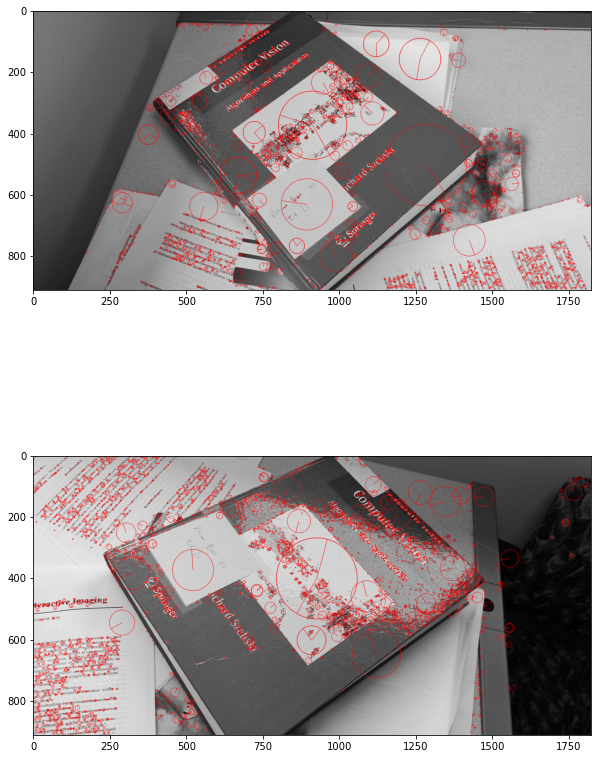

In [2]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html
# https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/

img1 = cv2.imread('p1.jpg')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2 = cv2.imread('p2.jpg')
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(img1_gray,None)
keypoints2, descriptors2 = sift.detectAndCompute(img2_gray,None)

img1_keypoints = cv2.merge([img1_gray, img1_gray, img1_gray])
cv2.drawKeypoints(img1_gray, keypoints1, img1_keypoints, color = (255, 0, 0), 
                    flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite("img1_keypoints.jpg", img1_keypoints)

img2_keypoints = cv2.merge([img2_gray, img2_gray, img2_gray])
cv2.drawKeypoints(img2_gray, keypoints2, img2_keypoints, color = (255, 0, 0), 
                    flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite("img2_keypoints.jpg", img2_keypoints)

plt.figure(1, figsize=(10, 15))
plt.subplot(211)
plt.imshow(img1_keypoints),plt.show
plt.subplot(212)
plt.imshow(img2_keypoints),plt.show

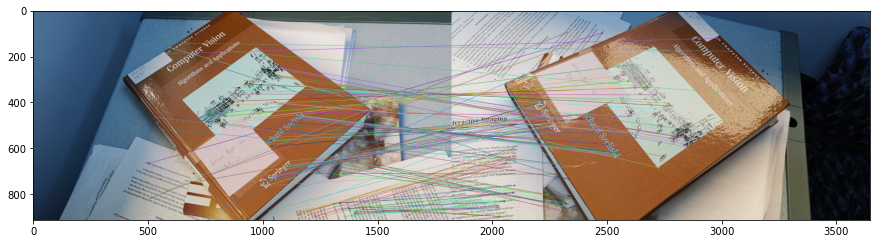

[[ 1.00249366e+00 -6.29887487e-03  1.26781589e-01]
 [ 3.78702114e-04  9.11444948e-01  1.97960732e-01]
 [ 1.89299768e-04 -7.34784415e-04  1.00000000e+00]]


In [5]:
# https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html
# https://docs.opencv.org/master/dc/dc3/tutorial_py_matcher.html# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_feature_homography/py_feature_homography.html
# https://www.geeksforgeeks.org/python-opencv-object-tracking-using-homography/

# intializing the dictionary 
index_params = dict(algorithm = 0, trees = 5) 
search_params = dict() 
   
flann = cv2.FlannBasedMatcher(index_params, search_params) 

# finding nearest matches of keypoints using KNN 
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

# keeping only the best points
good_points = []
for m, n in matches:
    if (m.distance < 0.6*n.distance):
        good_points.append(m)

sift_matching_img = cv2.drawMatches(img1, keypoints1, img2, keypoints2, good_points, None, flags=2)

# show sift matches
cv2.imwrite("SIFT_matching.jpg", sift_matching_img)
plt.figure(2, figsize=(15,20))
plt.imshow(sift_matching_img),plt.show()

# list of index of descriptors in img1
query_pts = np.float32([descriptors1[m.queryIdx] for m in good_points]).reshape(-1, 1, 2) 
  
# list of index of descriptors in img2 
train_pts = np.float32([descriptors2[m.trainIdx] for m in good_points]).reshape(-1, 1, 2) 
  
homography, _ = cv2.findHomography(query_pts, train_pts, cv2.RANSAC, 5.0) 

print(homography)